### This program uses MLP to predict closing stock price

In [30]:
#importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.pipeline import make_pipeline
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [31]:
ticker = 'AAPL'

In [32]:
#getting the stock quote
df = web.DataReader(ticker,data_source='yahoo',start='2012-01-01',end='2022-11-22')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.519279
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.586559
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.726296
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.859334
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.838937
...,...,...,...,...,...,...
2022-11-16,149.869995,147.289993,149.130005,148.789993,64218300.0,148.789993
2022-11-17,151.479996,146.149994,146.429993,150.720001,80389400.0,150.720001
2022-11-18,152.699997,149.970001,152.309998,151.289993,74794600.0,151.289993


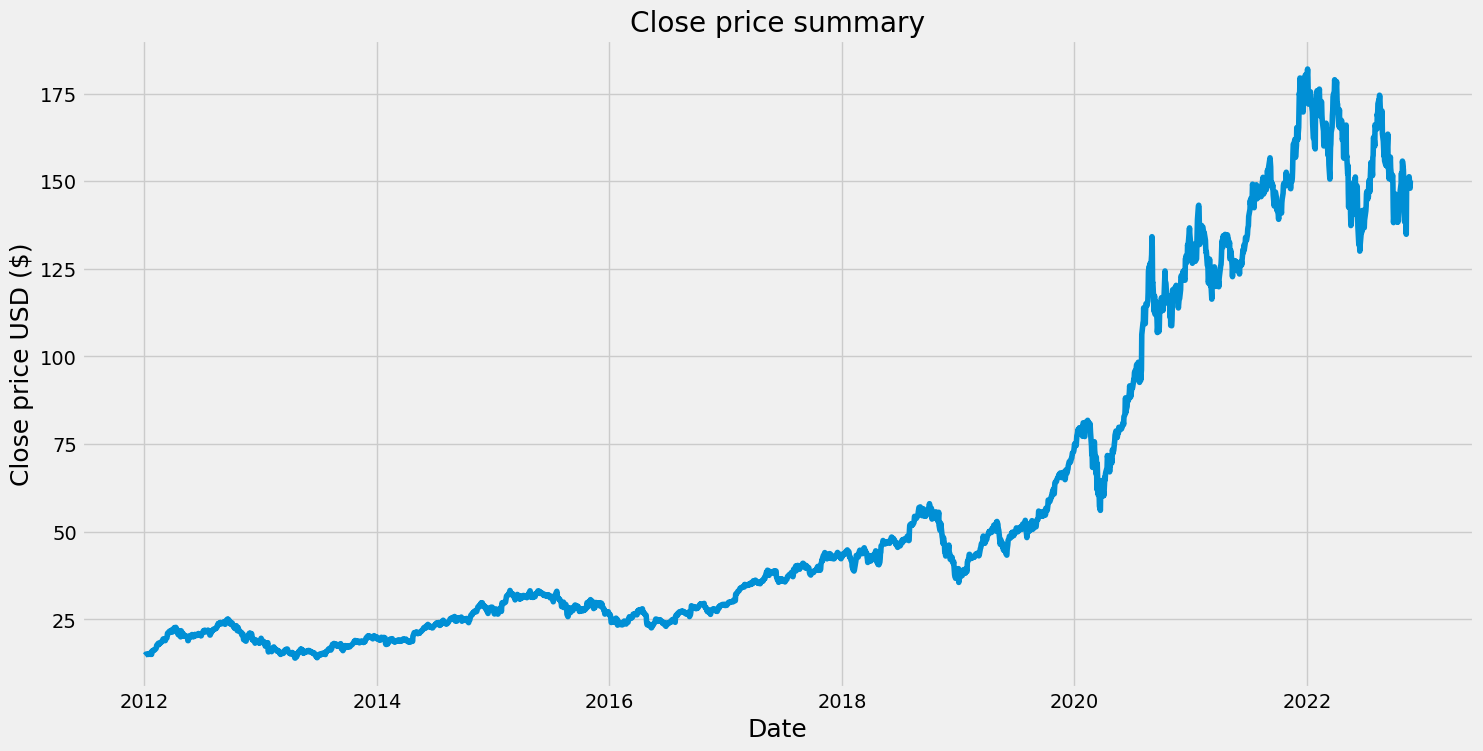

In [33]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price summary')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.show()

In [34]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [35]:
X = df.drop('Adj Close',axis=1).values
y = df['Adj Close'].values


In [49]:
#Scaling the data
scaler = MinMaxScaler()
X = scaler.fit_transform(X).astype('int')
y = scaler.fit_transform(y.reshape(-1,1)).astype('int')

In [50]:
#Splitting the data into 80% training and 20% testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [51]:
#Scaling the data and making a pipeline
clf = MLPClassifier(random_state=42,max_iter=500)

In [52]:
clf.fit(X_train,y_train)

/Users/abhishekshah/opt/anaconda3/envs/tensor/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(max_iter=500, random_state=42)

In [53]:
y_pred = clf.predict(X_test)

In [54]:
print(accuracy_score(y_test, y_pred))

0.9981785063752276


In [55]:
#Getting the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(y_pred-y_test)**2)
rmse

0.0018214936247723133

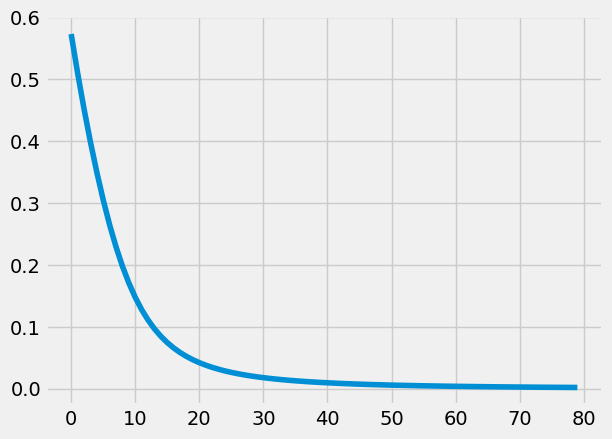

In [56]:
plt.plot(clf.loss_curve_)

In [57]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2022-11-23


In [59]:
#Get the quote 
Stock_quote = web.DataReader(ticker,data_source='yahoo',start='2020-01-01',end=today)
#Create a new dataframe
new_df = Stock_quote.filter(['Close'])
#get the last 60 day closing values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to values between 0 and 1
last_60_days_scaled = scalar.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the data to 3D
X_test == np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted price
pred_price = clf.predict(X_test)
#Undo scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

NameError: name 'scalar' is not defined

In [ ]:
Stock_quote2 = web.DataReader(ticker,data_source='yahoo',start='11-04-22',end='11-04-22')
print(Stock_quote2['Close'])

Date
2022-11-04    3770.550049
Name: Close, dtype: float64


In [ ]:
Price_difference = pred_price[0]-Stock_quote2['Close']
percent_change=Price_difference[0]/Stock_quote2['Close'][0]
print('Based on this analysis, there is a price difference of ${:.2f} from the predicted cost to the actual cost with % {:.2f} difference.'.format(Price_difference[0],percent_change))

Based on this analysis, there is a price difference of $-252.32 from the predicted cost to the actual cost with % -0.07 difference.
